In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import sklearn.cluster         # For KMeans class
import sklearn.mixture         # For GaussianMixture class
import sklearn.preprocessing   # For scale function
import mpl_toolkits.mplot3d 
def sample_gmm(means, covs=None, weights=None, N=1):
    """
    Samples a K-component D-dimensional Gaussian mixture.
    
    The means are KxD.
    The covariances are KxDxD. The default covariance is the DxD identity matrix.
    The weights are length K and must sum to 1. The default is uniform weights.
    
    Returns (X, c) where X is an NxD array of samples and c is a length-N vector
    of component indices, i.e. X[i] was sampled from mixture component c[i].
    """
    K, D = means.shape
    
    # Valudate inputs and set default values if needed
    if covs is None:
        covs = np.tile(np.eye(D), (K,1,1))  # Stack of K D-dimensional identity matricies
    if weights is None:
        weights = np.full(K, 1/K)
    assert covs.shape == (K,D,D)
    
    # Sample a vector of component choices in proportion to weights, one for each sample
    c = np.random.choice(K, N, p=weights)  # choice() checks that weights has shape (K,1) and sums to 1
    
    # Fill an array of N samples, one component at a time
    X = np.empty((N,D))
    for k in range(K):
        X[k==c] = np.random.multivariate_normal(means[k], covs[k], np.count_nonzero(k==c))
    return X, c


def plot_gmm(gmm):
    """
    Plots the placement of components in a Gaussian Mixture.
    
    The gmm object should be of type sklean.mixture.GaussianMixture
    """
    ax = plt.gca()
    for weight, mean, cov in zip(gmm.weights_, gmm.means_, gmm.covariances_):
        v, w = np.linalg.eigh(cov)
        v = 2*np.sqrt(2*v)
        u = w[0] / np.linalg.norm(w[0])
        angle = 180 * (1 + np.arctan(u[1]/u[0]) / np.pi)  # Ellipse() function needs degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], angle, edgecolor='k',
                                  facecolor='none', linestyle='--', linewidth=2, alpha=0.8)
        ax.add_artist(ell)

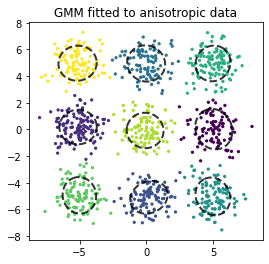

In [7]:
np.random.seed(0)
x, y = np.meshgrid([-5, 0, 5], [-5, 0, 5])
means = np.column_stack((x.flatten(), y.flatten()))
X , c = sample_gmm(means , N=1000)
gmm = sklearn.mixture.GaussianMixture(n_components=9,random_state=0, n_init=5).fit(X)
plot_gmm(gmm)
data = gmm.predict(X)
plt.scatter(*X.T, s=5 , c=data)
plt.title('GMM fitted to anisotropic data')
plt.gca().set_aspect('equal')